In [1]:
import numpy as np
import shared_functions as sf
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt

Following on from last time, things are starting to get exciting: we have a way to calculate area from points: Meister's Formula! This tells us that if we have points frpm on orientated n-gon (i.e. with an arbitrary amount of oreinted edges), we can calculate an area using the coordinates of the points: 
<br/>

$$ s(\widetilde{A_1A_2A_3A_4})=s(\widetilde{A_1A_2})+s(\widetilde{A_2A_3})+s(\widetilde{A_3A_4}+s(\widetilde{A_4A_1})\\=\frac12(x_1y_2-y_1x_2)+\frac12(x_2y_3-y_2x_3)+\frac12(x_3y_4-y_3x_4)+\frac12(x_4y_1-y_4x_1))\\=\frac{1}{2}(x_1y_2-y_1x_2+x_2y_3-y_2x_3+x_3y_4-y_3x_4+x_4y_1-y_4x_1).  $$


Before going any further, let's change the semantics a little in our Python functions, just to make it clear that we are really dealing with a formula that takes points, not vectors, and returns the signed area. Under the hood, vectors are still in play, but the formula is really just asking for points. I will also comment out the print functions which we don't need now we have a handle on how it works.

In [2]:
def compute_cross_product_from_two_points(points_list):
    c = points_list[0][0] * points_list[1][1] - points_list[0][1] * points_list[1][0]
    return(c)

def compute_signed_area_of_triangle_from_two_points(points_list):
    c = compute_cross_product_from_two_points(points_list)
    signed_area = c / 2
    return(signed_area)

def compute_signed_area_using_meisters_formula(points_list):

    total_signed_area = 0
    for each_point in range(len(points_list) - 1):
        signed_area = compute_signed_area_of_triangle_from_two_points([points_list[each_point], points_list[each_point + 1]])
        #print("Signed area of oriented side ", str(each_point + 1), ": ", points_list[each_point], points_list[each_point + 1], ": ", signed_area)
        total_signed_area = total_signed_area + signed_area

    final_signed_area = compute_signed_area_of_triangle_from_two_points([points_list[-1], points_list[0]])
    #print("Signed area of oriented side ", str(len(points_list)), ": ", points_list[-1], points_list[0], ": ", final_signed_area)
    total_signed_area = total_signed_area + final_signed_area
        
    #print("Total signed area is: ", total_signed_area)
    
    return(total_signed_area)

Let's check our formula still works. We will use the same n-gon from last notebook, but this time translate the points (increasing each $x$ and $y$ value by 1) to make sure this formula is general enough do deal with this. 

Start by plotting out the points for a visualisation:

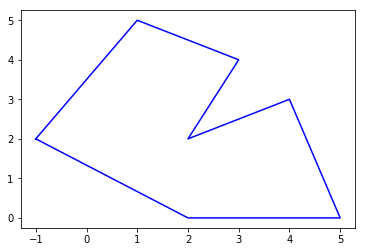

In [3]:
points_choice = np.array([[-1,2], [1,5], [3,4], [2,2], [4,3], [5,0], [2, 0]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
x_coords = [e[0] for e in points_for_plotting]
y_coords = [e[1] for e in points_for_plotting]
shape_from_points = plt.plot(x_coords, y_coords, 'b')

Now, compute the signed area:

In [4]:
s = compute_signed_area_using_meisters_formula(points_choice)
s

-16.5

Everything still seems to work. 

So what now? Well, how about curves? What if we were still wanted to use points from triangles or n-gons or whatever, but we wanted those points to also satisfy the paramterisations of a given curve? Like triangles where the points of each vertex are on a circle. What insights might that lead to? 

### Curves

Let's start out simply. Probably the simplest curve we might consider is the parabola, paramaterised by $y = x^2$. Let's take 3 points that satisfy this paramterisation, and use Meister's formula to find the signed area. Again, let's visualise things first:   

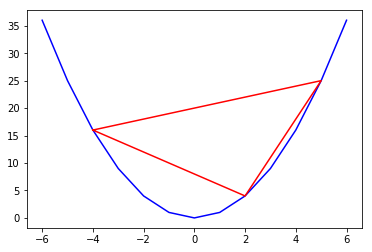

In [5]:
fig, ax = plt.subplots()
x2 = np.arange(start=-6, stop=7, step=1)
y2 = x2^2

points_choice = np.array([[-4,16], [2,4], [5,25]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')


In [6]:
s = compute_signed_area_using_meisters_formula(points_choice)
s

81.0

This all works fine, nothing big happening so far, we are simply imposing a condition, that our choice of points for a triangle must also meet the requirements of the paramaterisation, $y = x^2$.

Things become alot more intersting when we generalise this. Let's say we have 3 integers, $t_1, t_2$ and $t_3$, and are they were paramaterised as points on a parabola, to create the points $[t_1,t_1^2], [t_2,t_2^2]$, and $[t_3,t_3^2]$. 

Now we can't really visualise them of course, but we can use Meister's formula to see what answer we would get for the signed area.  

In [7]:
t_1, t_2, t_3 = sp.symbols('t_1, t_2, t_3')
points_choice = np.array([[t_1,t_1^2], [t_2,t_2^2], [t_3,t_3^2]])
s = compute_signed_area_using_meisters_formula(points_choice)
show(s)

-1/2*t_1^2*t_2 + 1/2*t_1*t_2^2 + 1/2*t_1^2*t_3 - 1/2*t_2^2*t_3 - 1/2*t_1*t_3^2 + 1/2*t_2*t_3^2

At first glance, things seem a little complicated. But look what happens when we factor this. It turns into a nice digestible formula in terms of the only original integers, $t_1, t_2$ and $t_3$:

In [8]:
show(s.factor())

-1/2*(t_1 - t_2)*(t_1 - t_3)*(t_2 - t_3)

So from Meister's Formula, we now get a special case where points are on a parabola. Note also that Sympy tends to deal with subtraction in its own way that is perhaps not too intuitive. But this formula, to calculate the signed area of a triangle whose vertices satisfy the paramterisation of a parabola, can also be written as: 

$$ \frac{(t_1-t_2)(t_2-t_3)(t_3-t_1)}{2} $$

What about other, more complex shapes, like quadrilaterals? Let's try 4 paramaterised points on $y=x^2$ and see what comes out: 

In [9]:
t_1, t_2, t_3, t_4 = sp.symbols('t_1, t_2, t_3, t_4')
points_choice = np.array([[t_1,t_1^2], [t_2,t_2^2], [t_3,t_3^2], [t_4,t_4^2]])
s = compute_signed_area_using_meisters_formula(points_choice)
show(s)

-1/2*t_1^2*t_2 + 1/2*t_1*t_2^2 - 1/2*t_2^2*t_3 + 1/2*t_2*t_3^2 + 1/2*t_1^2*t_4 - 1/2*t_3^2*t_4 - 1/2*t_1*t_4^2 + 1/2*t_3*t_4^2

Again, let's factor

In [10]:
show(s.factor())

-1/2*(t_1 - t_2 + t_3 - t_4)*(t_1 - t_3)*(t_2 - t_4)

We get another pleasant formula (Note again Sympy renders it a different way that perhaps we would like). We now have a formula to calculate the signed area of a quadrilateral whose vertices satisfy the paramterisation or a parabola is: 

$$  \frac{(t_4-t_2)(t_3-t_1)(t_4-t_1+t_2-t_3)}{2}.$$

So when we examine shapes on curves, the Meister formula seems to lead us some interesting results. Let's try and example now, to check this formula works as expected. Start with a visualisation:

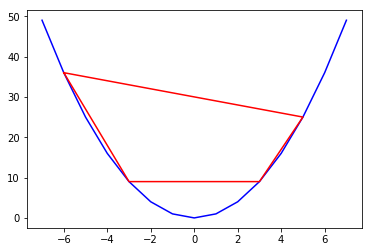

In [11]:
fig, ax = plt.subplots()
x2 = np.arange(start=-7, stop=8, step=1)
y2 = x2^2

# x2 = np.append(x2, x2[0])
# y2 = np.append(y2, y2[0])

points_choice = np.array([[-6,36], [-3,9], [3,9], [5, 25]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')


Now compute the area using Meister's formula:

In [12]:
s = compute_signed_area_using_meisters_formula(points_choice)
show(s)

180.0

Now pass the same values to a new function, the new formula we derived as the area of a quadrilateral on a parabola: 

In [13]:
def compute_using_meister_with_parabola_paramatisation(a, b, c, d):
    return (((d - b) * (c - a)* (d - a + b - c)) / 2)

compute_using_meister_with_parabola_paramatisation(-6, -3, 3, 5)

180

Looking good! 

Let's ask a related question. What if we have 3 fixed points on a parabola and another (call it $t$) we can place anywhere: what value of $t$ can we choose to maximise the area? This is the kind of question comes up all the time in calculus. 

Start with a visualisation, assumming that we have 3 fixed points on a parabola:

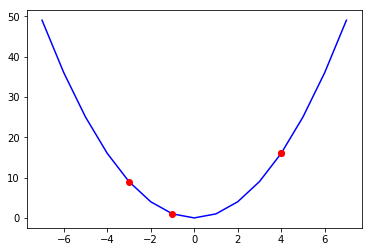

In [14]:
fig, ax = plt.subplots()
x2 = np.arange(start=-7, stop=8, step=1)
y2 = x2^2

points_choice = np.array([[4,16], [-3,9], [-1,1]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'ro')


So we can place a fourth point anywhere we like. But the question is where should it be placed to maximise the area of our quadrilateral that we can then form with the 4 points. 

Start with 3 points thats that are fixed, and a fourth point, $t$ and use our new formul:

In [15]:
t = sp.symbols('t')
s = compute_using_meister_with_parabola_paramatisation(4, -3, -1, t)
s.factor()

-5*(t - 6)*(t + 3)/2

So what should $t$ be to ensure that the area is maximised. Well, recall that that that product of any two numbers is maximised when those two numbers are the same (there is a formal proof of this at 3.2.1 in the proof sketches). 

Think of it like this: if you toss two dice and can multiply any of combinations that come up, what is you maximum going to be? Its when both numbers come up the same:

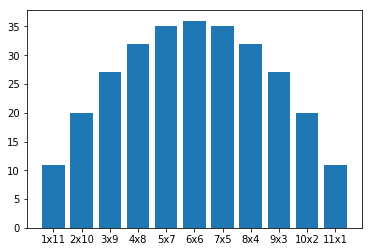

In [16]:
m = [i * (12 - i) for i in range(1,12)]
l = [str(i) + "x" +  str(12 - i) for i in range(1,12)]
p = plt.bar(l, m)

So let's take those factors involving $t$ and find out the value for $t$ when they are same. Note I will manipulate this expression a little, putting that minus sign back in one of the terms and then ignoring the 5 as its not factor to consider for this question, as we are intested in the value for $t$ that makes both factors equal. We end up setting $(t+3)$ to $(6 - t)$ and solving:

In [17]:
e = sp.Eq((t + 3), (6 - t))
sp.solve(e, t)

[3/2]

So when $t = \frac{3}{2}$ we have the biggest area. Let's put it into the function:

In [18]:
t = sp.symbols('t')
s = compute_using_meister_with_parabola_paramatisation(4, -3, -1, 3/2)
s

405/8

Let's plot things, just to have a look at the choice of $t$ that would maximise area

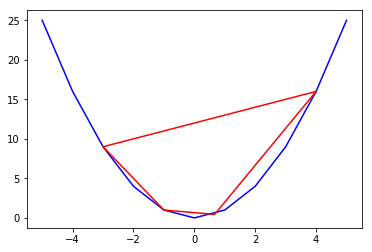

In [19]:
fig, ax = plt.subplots()
x2 = np.arange(start=-5, stop=6, step=1)
y2 = x2^2

points_choice = np.array([[4,16], [-3,9], [-1,1], [2/3, 4/9]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)

x1 = [e[0] for e in points_for_plotting]
y1 = [e[1] for e in points_for_plotting]

plt.plot(x2, y2, 'b')
plt.plot(x1, y1, 'r')


So when $t = \frac{405}{8}$, (or 50.625), the quadrilateral is at its maximum area given the other fixed points.

Let's further verify this by checking the values of area near $t$. We would expect the area would be getting bigger as it get's closer to $t$, and then start getting smaller as it moves away. Let's run our formula to compute the area 7000 times (an arbitrary number), near values of our optimal $t$ value:

In [20]:
diffent_values_of_t = np.arange(-2, 5, .001)
areas_close_to_the_max = []

for i in range(len(diffent_values_of_t)):
    areas_close_to_the_max.append(compute_using_meister_with_parabola_paramatisation(4, -3, -1, diffent_values_of_t[i]))
    

Now plot the values of $t$ and the areas. Sure enough, things get to a maximum before going down again. It seems to work!

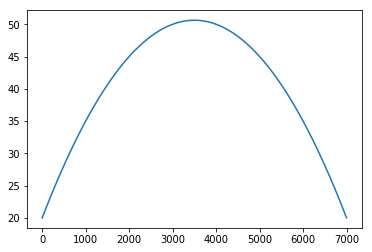

In [21]:
plt.plot(areas_close_to_the_max)

Let's wrap up there, see you in the next notebook. 